# QCNN : Quantum Convolutional Neural Network (Using early stopping with minimal loss variation)

In [1]:
import pennylane.numpy as np
from model_parameters import ModelParameters
from helper.torch_training import run_torch_sequence
from helper.scores import Metrics
from helper.quantum import create_qcnn_model

## Data loading

In [2]:
model_parameters = ModelParameters()
x_train, x_test, y_train, y_test = model_parameters.get_htru_2()

## Model definition

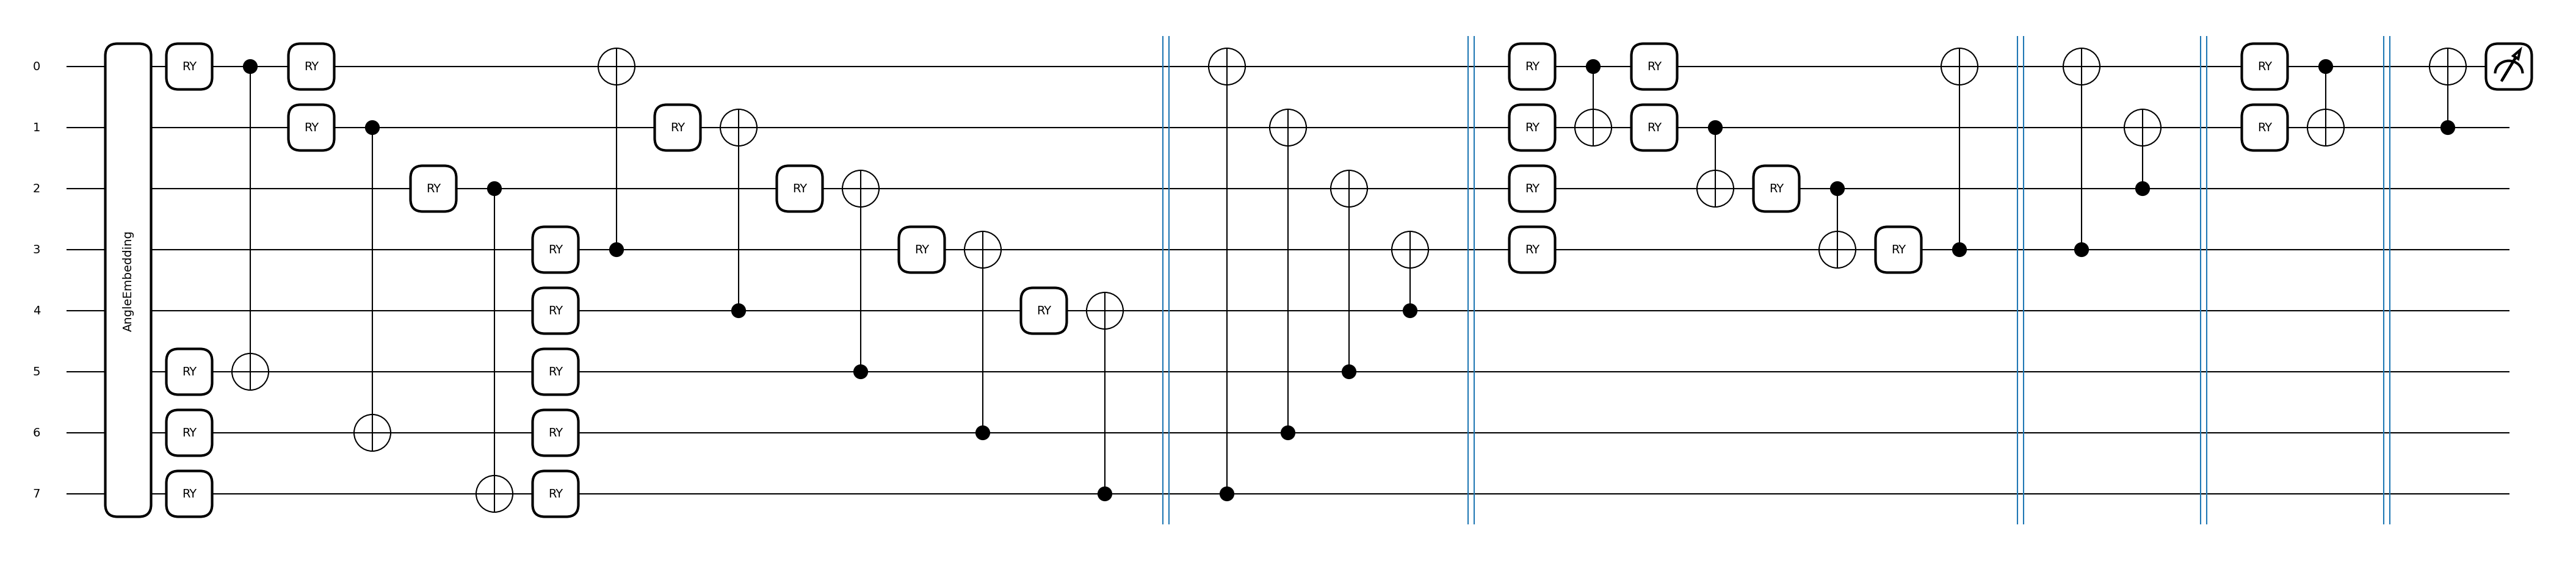

In [3]:
model = create_qcnn_model(model_parameters, True, 5)

def model_creator():
    return create_qcnn_model(model_parameters, False)

## Training QCNN

### Normal QCNN

QCNN trained on each data without batches.

 17%|█▋        | 1/6 [00:55<04:39, 55.98s/it]

Stopping early at epoch 12. Validation loss has not improved for 5 epochs.


 33%|███▎      | 2/6 [01:28<02:47, 41.95s/it]

Stopping early at epoch 8. Validation loss has not improved for 5 epochs.


 50%|█████     | 3/6 [01:56<01:47, 35.94s/it]

Stopping early at epoch 7. Validation loss has not improved for 5 epochs.


 67%|██████▋   | 4/6 [02:26<01:06, 33.31s/it]

Stopping early at epoch 7. Validation loss has not improved for 5 epochs.


 83%|████████▎ | 5/6 [03:23<00:41, 41.81s/it]

Stopping early at epoch 13. Validation loss has not improved for 5 epochs.


100%|██████████| 6/6 [03:51<00:00, 38.57s/it]

Stopping early at epoch 7. Validation loss has not improved for 5 epochs.


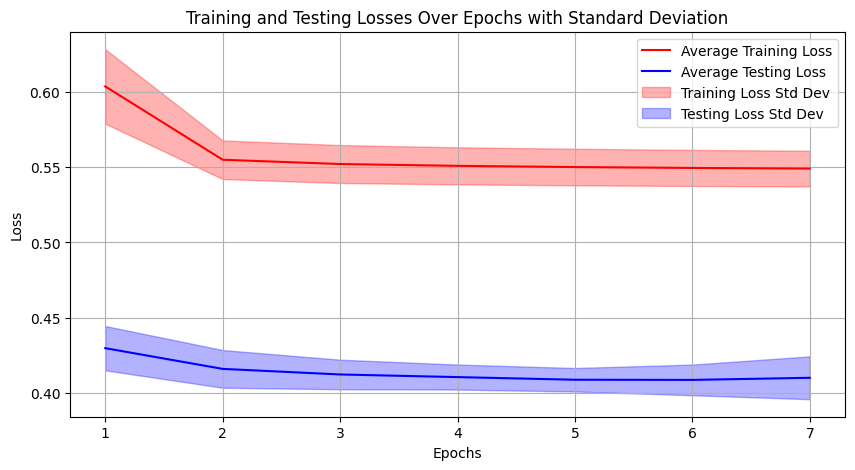

Pour 6 runs:
Accuracy: 0.953 ± 0.012
Balanced Accuracy: 0.721 ± 0.049
Recall: 0.443 ± 0.099
Specificity: 1.000 ± 0.001
Precision: 0.990 ± 0.023
NPV: 0.951 ± 0.013
G-Mean: 0.661 ± 0.076
Informedness: 0.443 ± 0.099
Training Duration: 38.519 ± 12.690
Testing Duration: 0.040 ± 0.002


In [7]:
metrics = Metrics()
run_torch_sequence(model_parameters, model_creator, x_train, y_train, x_test, y_test, metrics, batch_size=1, early_stopping_threshold=0.0005)
metrics.display()

### Batched QCNN

QCNN that is trained on batches of 10.

 17%|█▋        | 1/6 [00:13<01:05, 13.09s/it]

Stopping early at epoch 26. Validation loss has not improved for 5 epochs.


 33%|███▎      | 2/6 [00:18<00:33,  8.28s/it]

Stopping early at epoch 10. Validation loss has not improved for 5 epochs.


 50%|█████     | 3/6 [00:51<00:59, 19.98s/it]

Stopping early at epoch 69. Validation loss has not improved for 5 epochs.


 67%|██████▋   | 4/6 [01:03<00:32, 16.49s/it]

Stopping early at epoch 23. Validation loss has not improved for 5 epochs.


 83%|████████▎ | 5/6 [01:11<00:13, 13.57s/it]

Stopping early at epoch 17. Validation loss has not improved for 5 epochs.


100%|██████████| 6/6 [01:22<00:00, 13.67s/it]

Stopping early at epoch 22. Validation loss has not improved for 5 epochs.


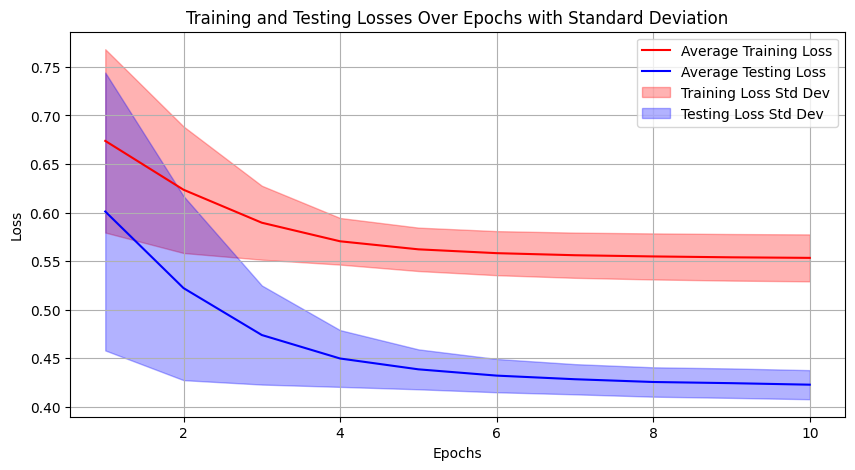

Pour 6 runs:
Accuracy: 0.954 ± 0.009
Balanced Accuracy: 0.759 ± 0.047
Recall: 0.519 ± 0.095
Specificity: 0.999 ± 0.002
Precision: 0.989 ± 0.025
NPV: 0.952 ± 0.010
G-Mean: 0.717 ± 0.066
Informedness: 0.518 ± 0.094
Training Duration: 13.528 ± 9.403
Testing Duration: 0.040 ± 0.001


In [4]:
metrics = Metrics()
run_torch_sequence(model_parameters, model_creator, x_train, y_train, x_test, y_test, metrics, batch_size=10, early_stopping_threshold=0.0005)
metrics.display()

### All batches

QCNN that is trained on all batches at once.

 50%|█████     | 3/6 [00:43<00:42, 14.22s/it]

Stopping early at epoch 121. Validation loss has not improved for 5 epochs.


 67%|██████▋   | 4/6 [00:55<00:26, 13.21s/it]

Stopping early at epoch 108. Validation loss has not improved for 5 epochs.


100%|██████████| 6/6 [01:23<00:00, 13.84s/it]

Stopping early at epoch 110. Validation loss has not improved for 5 epochs.


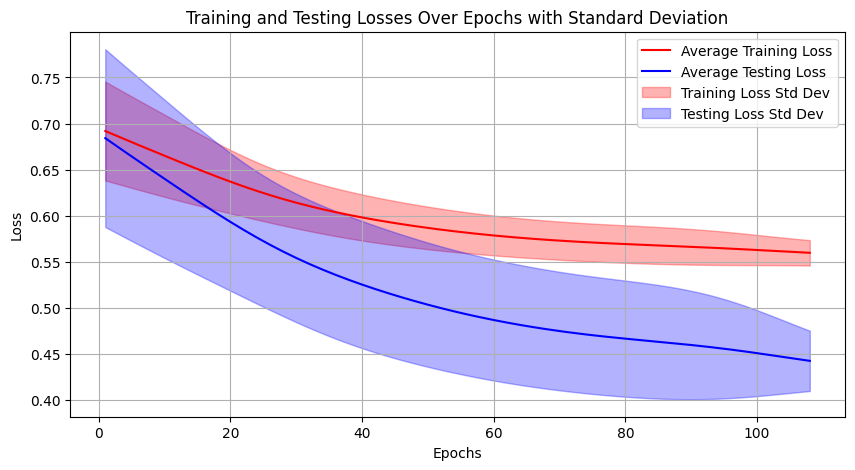

Pour 6 runs:
Accuracy: 0.952 ± 0.012
Balanced Accuracy: 0.744 ± 0.042
Recall: 0.490 ± 0.083
Specificity: 0.999 ± 0.003
Precision: 0.972 ± 0.062
NPV: 0.951 ± 0.012
G-Mean: 0.697 ± 0.060
Informedness: 0.489 ± 0.085
Training Duration: 13.785 ± 2.030
Testing Duration: 0.038 ± 0.002


In [5]:
metrics = Metrics()
run_torch_sequence(model_parameters, model_creator, x_train, y_train, x_test, y_test, metrics, batch_size=model_parameters.training_samples, early_stopping_threshold=0.0005)
metrics.display()

### Various strides

QCNN that is trained on all batches at once with various strides.

Quantum CNN with a stride of 1


 17%|█▋        | 1/6 [00:10<00:52, 10.52s/it]

Stopping early at epoch 103. Validation loss has not improved for 5 epochs.


 33%|███▎      | 2/6 [00:21<00:42, 10.54s/it]

Stopping early at epoch 103. Validation loss has not improved for 5 epochs.


 50%|█████     | 3/6 [00:31<00:31, 10.43s/it]

Stopping early at epoch 98. Validation loss has not improved for 5 epochs.


 67%|██████▋   | 4/6 [00:42<00:21, 10.71s/it]

Stopping early at epoch 102. Validation loss has not improved for 5 epochs.


 83%|████████▎ | 5/6 [00:52<00:10, 10.33s/it]

Stopping early at epoch 94. Validation loss has not improved for 5 epochs.


100%|██████████| 6/6 [01:07<00:00, 11.26s/it]


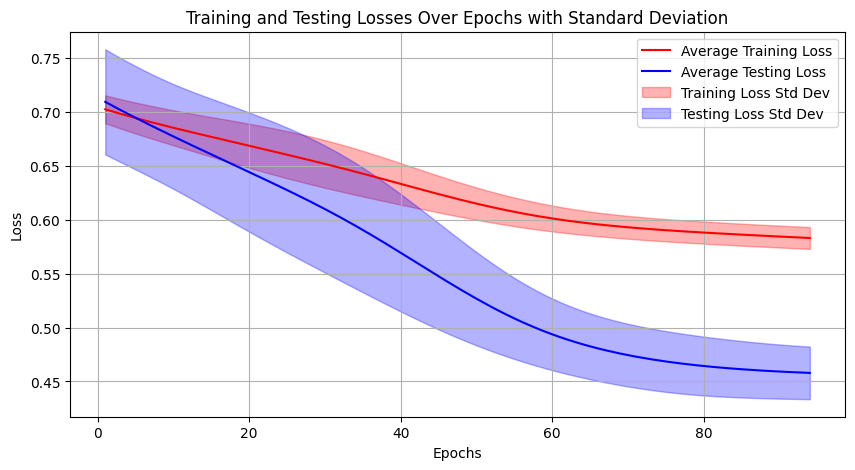

Pour 6 runs:
Accuracy: 0.944 ± 0.019
Balanced Accuracy: 0.798 ± 0.036
Recall: 0.617 ± 0.083
Specificity: 0.978 ± 0.025
Precision: 0.812 ± 0.188
NPV: 0.960 ± 0.009
G-Mean: 0.775 ± 0.048
Informedness: 0.595 ± 0.072
Training Duration: 11.212 ± 1.904
Testing Duration: 0.036 ± 0.001
---------------------------------------------------
Quantum CNN with a stride of 2


 33%|███▎      | 2/6 [00:26<00:51, 12.80s/it]

Stopping early at epoch 98. Validation loss has not improved for 5 epochs.


 50%|█████     | 3/6 [00:33<00:30, 10.09s/it]

Stopping early at epoch 63. Validation loss has not improved for 5 epochs.


 67%|██████▋   | 4/6 [00:41<00:18,  9.38s/it]

Stopping early at epoch 76. Validation loss has not improved for 5 epochs.


100%|██████████| 6/6 [01:09<00:00, 11.64s/it]

Stopping early at epoch 113. Validation loss has not improved for 5 epochs.


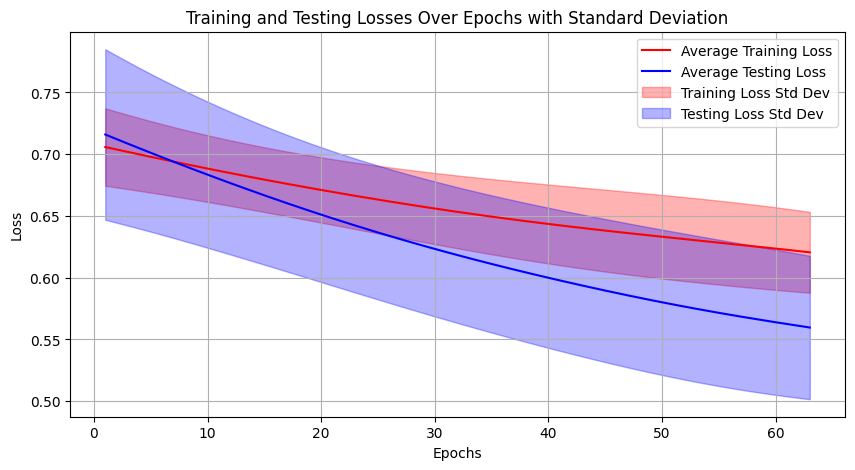

Pour 6 runs:
Accuracy: 0.923 ± 0.014
Balanced Accuracy: 0.793 ± 0.056
Recall: 0.633 ± 0.125
Specificity: 0.953 ± 0.026
Precision: 0.612 ± 0.177
NPV: 0.962 ± 0.013
G-Mean: 0.772 ± 0.070
Informedness: 0.586 ± 0.112
Training Duration: 11.592 ± 3.560
Testing Duration: 0.041 ± 0.003
---------------------------------------------------
Quantum CNN with a stride of 3


 33%|███▎      | 2/6 [00:27<00:53, 13.48s/it]

Stopping early at epoch 115. Validation loss has not improved for 5 epochs.


 50%|█████     | 3/6 [00:33<00:30, 10.18s/it]

Stopping early at epoch 58. Validation loss has not improved for 5 epochs.


 83%|████████▎ | 5/6 [00:59<00:11, 11.56s/it]

Stopping early at epoch 96. Validation loss has not improved for 5 epochs.


100%|██████████| 6/6 [01:11<00:00, 11.90s/it]

Stopping early at epoch 111. Validation loss has not improved for 5 epochs.


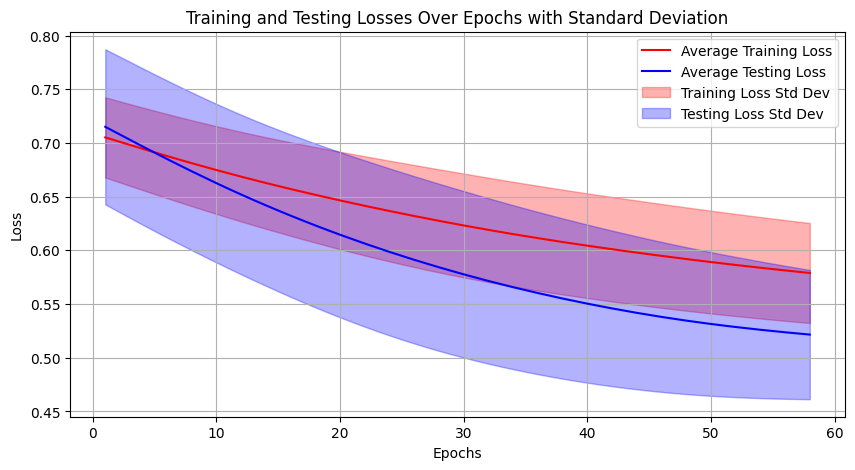

Pour 6 runs:
Accuracy: 0.967 ± 0.017
Balanced Accuracy: 0.880 ± 0.038
Recall: 0.771 ± 0.067
Specificity: 0.988 ± 0.015
Precision: 0.885 ± 0.138
NPV: 0.976 ± 0.007
G-Mean: 0.872 ± 0.042
Informedness: 0.759 ± 0.076
Training Duration: 11.846 ± 3.230
Testing Duration: 0.040 ± 0.005
---------------------------------------------------
Quantum CNN with a stride of 4


 17%|█▋        | 1/6 [00:12<01:00, 12.10s/it]

Stopping early at epoch 110. Validation loss has not improved for 5 epochs.


 33%|███▎      | 2/6 [00:18<00:34,  8.56s/it]

Stopping early at epoch 55. Validation loss has not improved for 5 epochs.


 50%|█████     | 3/6 [00:29<00:30, 10.04s/it]

Stopping early at epoch 110. Validation loss has not improved for 5 epochs.


 67%|██████▋   | 4/6 [00:35<00:16,  8.25s/it]

Stopping early at epoch 52. Validation loss has not improved for 5 epochs.


 83%|████████▎ | 5/6 [00:40<00:07,  7.22s/it]

Stopping early at epoch 50. Validation loss has not improved for 5 epochs.


100%|██████████| 6/6 [00:55<00:00,  9.29s/it]

Stopping early at epoch 140. Validation loss has not improved for 5 epochs.


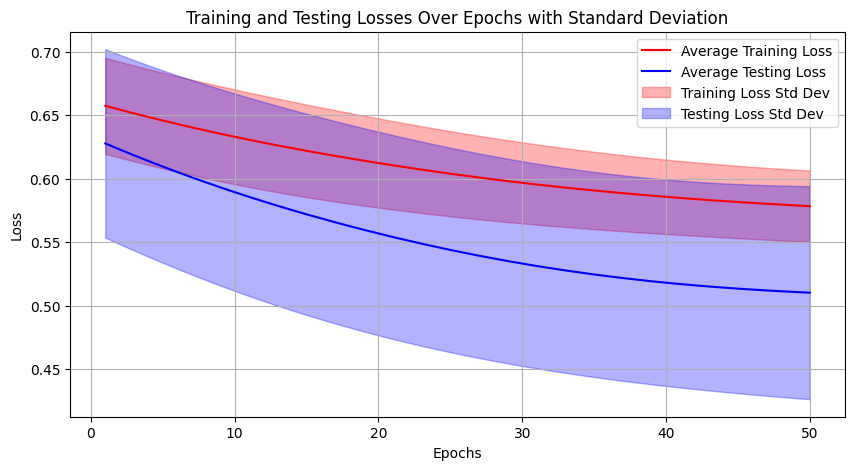

Pour 6 runs:
Accuracy: 0.917 ± 0.053
Balanced Accuracy: 0.806 ± 0.051
Recall: 0.666 ± 0.168
Specificity: 0.946 ± 0.076
Precision: 0.744 ± 0.276
NPV: 0.963 ± 0.019
G-Mean: 0.783 ± 0.069
Informedness: 0.612 ± 0.103
Training Duration: 9.245 ± 3.773
Testing Duration: 0.038 ± 0.001
---------------------------------------------------
Quantum CNN with a stride of 5


 17%|█▋        | 1/6 [00:11<00:55, 11.03s/it]

Stopping early at epoch 101. Validation loss has not improved for 5 epochs.


 67%|██████▋   | 4/6 [00:53<00:26, 13.28s/it]

Stopping early at epoch 103. Validation loss has not improved for 5 epochs.


100%|██████████| 6/6 [01:26<00:00, 14.35s/it]


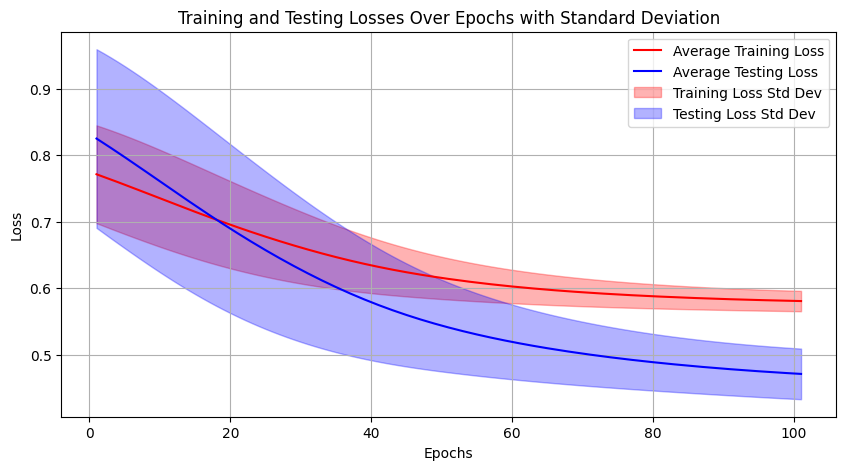

Pour 6 runs:
Accuracy: 0.947 ± 0.017
Balanced Accuracy: 0.771 ± 0.049
Recall: 0.547 ± 0.095
Specificity: 0.996 ± 0.004
Precision: 0.938 ± 0.051
NPV: 0.947 ± 0.016
G-Mean: 0.735 ± 0.066
Informedness: 0.543 ± 0.097
Training Duration: 14.300 ± 2.432
Testing Duration: 0.037 ± 0.000
---------------------------------------------------


In [6]:
for i in range(1, 6):

    def model_creator():
        return create_qcnn_model(model_parameters, False, i)

    metrics = Metrics()

    print("Quantum CNN with a stride of " + str(i))
    run_torch_sequence(model_parameters, model_creator, x_train, y_train, x_test, y_test, metrics, batch_size=model_parameters.training_samples, early_stopping_threshold=0.0005)
    metrics.display()
    print("---------------------------------------------------")